In [ ]:
%%bash
pip install rise
jupyter-nbextension install rise --py --sys-prefix
jupyter-nbextension enable rise --py --sys-prefix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

def initialize_2d_plot(x_min=-1, x_max=8, y_min=-1, y_max=8, figsize=(6,6)):
    """Default values: x_min=-1, x_max=8, y_min=-1, y_max=8"""
    fig = plt.figure(figsize=figsize)
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')  

# Introduction to Linear Algebra

### Back to Algebra I

The slope-intercept equation:

$$y = mx+b$$

### What do we know about this equation?

### Pythonic Representation

Next, we will use Python to model a linear function of two variables.

To do this, we will use `np.linspace` to provide us with a set of $x$ values.

<p style="font-size: 11px;">
<code>
Signature: np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.
</code>
</p>

The word "model" here is important. A mathematical function in a computer is by necessity a model. We typically think of mathematical functions as continuous. In between two points on a function curve, we can always find a third point. 

Mathematical functions modeled using Python will be a set of discrete values. Thus the function $y = f(x) = x + 1$ is modeled as such

#### I. we use a `lambda` function to describe its behavior

In [2]:
f = lambda x: x + 1

#### II. given a discrete set of values

In [8]:
xs = np.linspace(-3,3,7)
xs

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

####  III. we model the function as a discrete set of values

In [6]:
ys = f(xs)
ys

array([-2., -1.,  0.,  1.,  2.,  3.,  4.])

## Consider this linear equation in two variables

$$y = 3x - 2$$

Describe its behavior.

In [9]:
f = lambda x: 3*x + -2

Given a discrete set of values,

In [10]:
xs = np.linspace(-3,3,20)

Model as a discrete set of values.

In [11]:
ys = f(xs)

### Plot the linear function

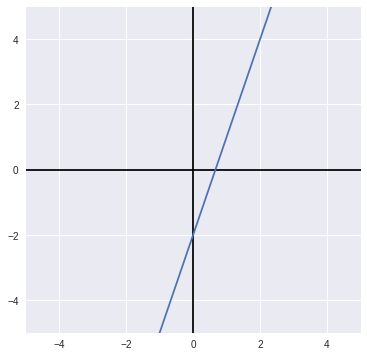

In [12]:
fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(xs, ys)

## A System of Linear Equations

$$y = 3x - 2$$

$$y = -5x + 6$$

### What is the solution to a system of linear equations? *Is there a general solution*?

### Is a single equation a system?

### What does this mean about the solution to a system of equations?

### Model System of Equations in Python

In [13]:
f1 = lambda x: 3*x - 2
f2 = lambda x: -5*x + 6
y1s = f1(xs)
y2s = f2(xs)

### Plot System of Equations in Python

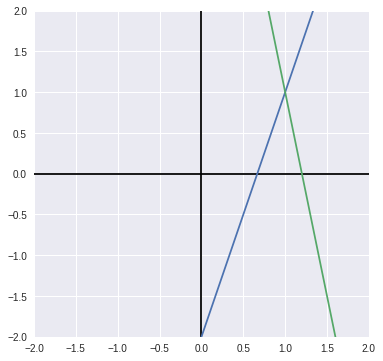

In [14]:
fig = initialize_2d_plot(-2,2,-2,2)
plt.plot(xs, y1s)
plt.plot(xs, y2s)

## Find the Solution Analytically

$$y = 3x - 2$$
$$y = -5x + 6$$

$$3x-2=-5x+6$$

$$8x = 8$$

$$8x = 8$$

$$x=1$$

$$y = 3\cdot1 - 2 = 1$$
$$y = -5\cdot1 + 6 = 1 $$
$$\implies\text{solution: } (1,1)$$

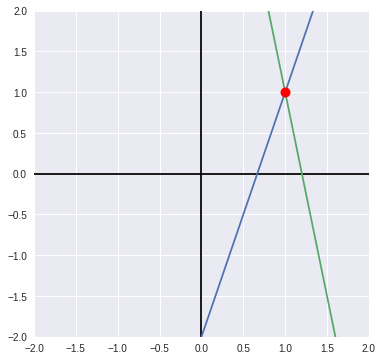

In [18]:
fig = initialize_2d_plot(-2,2,-2,2)
plt.plot(xs, y1s)
plt.plot(xs, y2s)
plt.plot(1,1,'o',c='red', markersize=10)

## Find the Solution Analytically

Convert to Standard Form $Ax + By = C$
$$y = 3x - 2 \implies -3x + y = -2$$
$$y = -5x + 6 \implies 5x + y = 6$$

$$-8x = -8$$

$$x=1 \implies y = 1$$

## Forward to Linear Algebra

The basis of linear algebra is the **vector**.

A vector is a multi-dimensional element. 

e.g. $(1)$, $(1,3,5,8)$, $(1,2,\dots,50)$

As opposed to a **scalar**

e.g. $1, \sqrt{2}, e, \pi, 101010, 47$

### What can we do with Scalars?

- add
- subtract
- multiply
- divide


### A Vector Drawing Helper Function

In [19]:
def draw_vector(np_array, tail=np.array([0,0]), kwargs=None):
    """Pass a vector of dimension 2 and a figure.
       Optionally, specify a start point. Defaults to the origin.
       """
    u_1 = np_array[0]
    u_2 = np_array[1]
    tail_1 = tail[0]
    tail_2 = tail[1]
    if kwargs:
        plt.arrow(tail_1,tail_2,u_1,u_2, **kwargs, head_width=0.25, head_length=0.25)
    else:
        plt.arrow(tail_1,tail_2,u_1,u_2, head_width=0.25, head_length=0.25)

### What can we do with Vectors?

to get a vector back:

- add vectors of equal dimension
- multiply a vector by a scalar

### What can we do with Vectors?

to get a scalar back:

- multiply two vectors of the same dimension via the inner or **dot product**

### Add Two Vectors

$$(-1,2) + (3,5) = (2,7)$$

In [20]:
a = np.array((-1,2))
b = np.array((3,5))
a + b

array([2, 7])

### Add Two Vectors

$$(-1,2) + (3,5) = (2,7)$$

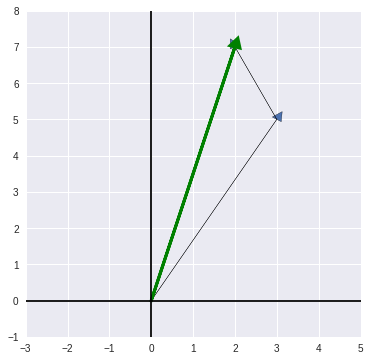

In [21]:
initialize_2d_plot(-3,5,-1,8)
draw_vector(b)
draw_vector(a, tail=b)
draw_vector(a+b, kwargs={'color':'green', 'linewidth':3})

### Multiply a Vector by a Scalar
$$3\cdot(-1.5,1.3)=(-4.5,3.9)$$

In [22]:
c = np.array((-1.5,1.3))
3*c

array([-4.5,  3.9])

### Multiply a Vector by a Scalar
$$3\cdot(-1.5,1.3)=(-4.5,3.9)$$

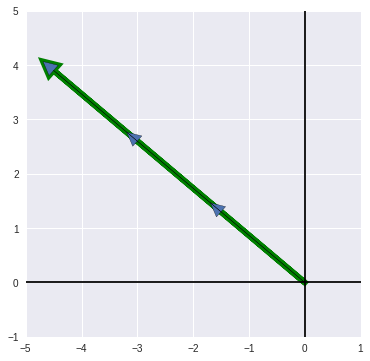

In [23]:
initialize_2d_plot(-5,1,-1,5)
draw_vector(3*c, kwargs={'color':'green', 'linewidth':6})
draw_vector(c)
draw_vector(c, tail=c)
draw_vector(c, tail=c+c)

### Multiply Two Vectors by the Dot Product

$$\mathbf{u}=(1,0,-1)$$

$$\mathbf{v}=(-3,3,-2)$$

$$\langle \mathbf{u}, \mathbf{v}\rangle = 1\cdot(-3)+0\cdot3+(-1)\cdot(-2)=-1$$

$$\langle \mathbf{u}, \mathbf{v}\rangle = \sum u_i\cdot v_i$$

In [24]:
u = np.array((1,0,-1)); v = np.array((-3,3,-2))
u.dot(v)

-1

**NOTE:** $$\langle \mathbf{u}, \mathbf{v}\rangle = \langle \mathbf{v}, \mathbf{u}\rangle$$ for all $\mathbf{u}$, $\mathbf{v}$ 

In [25]:
assert u.dot(v) == v.dot(u)

## A Note on Writing Vectors

These two forms of vector representation are equivalent 

$$(a,b,c,d)=\left(\begin{matrix}a\\b\\c\\d\end{matrix}\right)$$

This form is known as the **column vector** form. 

A vector written as boldface later e.g. $\mathbf{u}$ is typically considered to be in column vector form.

## A Note on Writing Vectors

A vector written as 

$$\left(\begin{matrix}e& f& g& h\end{matrix}\right)$$ 

is considered to be written in the **row vector** form.

## Changing Vectors Forms

Vectors can be transformed from one form to the other via the transpose operation.

$$\mathbf{m}=(1,2,3,4)$$

then

$$\mathbf{m}^T=\left(\begin{matrix}1&2&3&4\end{matrix}\right)$$

This is important because we think of the dot product as **a row vector times a column vector**

$$\langle \mathbf{u}, \mathbf{v}\rangle = \sum u_i\cdot v_i = \mathbf{u}^T\mathbf{v}=\left(\begin{matrix}1&0&-1\end{matrix}\right)\left(\begin{matrix}-3\\3\\-2\end{matrix}\right)= 1\cdot(-3)+0\cdot3+(-1)\cdot(-2)=1$$

### What if one of the vectors holds variables?

$$\mathbf{x} = (x_1, x_2, x_3)$$

In [26]:
import sympy
x1 = sympy.var('x1')
x2 = sympy.var('x2')
x3 = sympy.var('x3')
x = np.array((x1,x2,x3))

$$\langle \mathbf{v}, \mathbf{x}\rangle = \sum v_i\cdot x_i = \mathbf{v}^T\mathbf{x}=\left(\begin{matrix}-3&3&-2\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\\x_3\end{matrix}\right)=  -3x_1+3x_2-2x_3$$

In [27]:
v.dot(x)

-3*x1 + 3*x2 - 2*x3

## Find the Solution Analytically

Back to our system of linear equations.

Our system in standard form, where we change our two variables to $x_1$ and $x_2$:
$$-3x_1 + x_2 = -2$$
$$5x_1 + x_2 = 6$$

Can be rewritten as 

$$(-3,1)^T(x_1,x_2)=-2$$
$$(5,1)^T(x_1,x_2)=6$$

$$\left(\begin{matrix}-3&1\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\end{matrix}\right)=-2$$
$$\left(\begin{matrix}5 &1\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\end{matrix}\right)=6$$

$$\left(\begin{matrix}-3&1\\5 &1\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\end{matrix}\right)=\left(\begin{matrix}-2\\6\end{matrix}\right)$$

$$\left(\begin{matrix}-3&1\\5 &1\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\end{matrix}\right)=\left(\begin{matrix}-2\\6\end{matrix}\right)$$

Let 
$$A = \left(\begin{matrix}-3&1\\5 &1\end{matrix}\right)$$
$$\mathbf{x}=\left(\begin{matrix}x_1\\x_2\end{matrix}\right)$$
$$\mathbf{b}=\left(\begin{matrix}-2\\6\end{matrix}\right)$$

$$\left(\begin{matrix}-3&1\\5 &1\end{matrix}\right)\left(\begin{matrix}x_1\\x_2\end{matrix}\right)=\left(\begin{matrix}-2\\6\end{matrix}\right)$$

$$A\mathbf{x}=\mathbf{b}$$

represents

$$y = 3x - 2$$
$$y = -5x + 6$$

In [28]:
A = np.array([(-3,1),(5,1)])
b = np.array((-2,6))

To solve something simple like $3x=6$, we simply divide by 3 on both sides, then $x=2$.

**We can not divide vectors.**

In some cases, we can take the inverse.

In [29]:
inverse = np.linalg.inv

$$A\mathbf{x}=\mathbf{b}$$

If the inverse of $A$ exists

$$A^{-1}A\mathbf{x}=A^{-1}\mathbf{b}$$

By definition of the inverse of $A$

$$I\mathbf{x}=A^{-1}\mathbf{b}$$

$$\mathbf{x}=A^{-1}\mathbf{b}$$

In [30]:
x = inverse(A).dot(b)
x

array([ 1.,  1.])

### Are you ready to bake your noodle?

<img src="http://2.bp.blogspot.com/-KsyDkjwLgVE/UXiLUNn0sAI/AAAAAAAALaI/CfrmvOjXR24/s1600/1-029.JPG"
     width=400px>

### What if we know some points and not the function?

e.g. the points $(-3,4)$ and $(2,-3$)

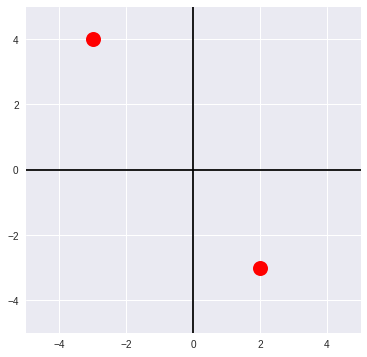

In [31]:
fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(-3,4,'o',c='red', markersize=15)
plt.plot(2,-3,'o',c='red', markersize=15)

### We can use linear algebra to find the form of the function we should use!

We know that the equation looks like this

$$y_i=\beta_0+\beta_1x_i$$


That we can rewrite as

$$(1,x_i)^T(\beta_0, \beta_1)=y_i$$

or

$$\left(\begin{matrix}1&x_i\end{matrix}\right)\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)=y_i$$

### We can enter our data using the matrix form

$$
\left(\begin{matrix}1&-3\\1&2\end{matrix}\right)
\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)=\left(\begin{matrix}4\\-3\end{matrix}\right)$$

Which we can think of as $$X\beta=\mathbf{y}$$

$$X\beta=\mathbf{y}$$

$$\beta=X^{-1}\mathbf{y}$$

In [32]:
X = np.array([(1,-3),(1,2)])
y = np.array((4,-3))
beta = inverse(X).dot(y)
beta

array([-0.2, -1.4])

### Check our Answer

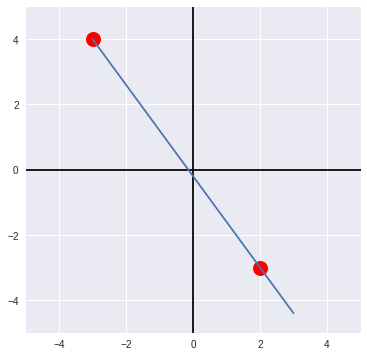

In [33]:
fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(-3,4,'o',c='red', markersize=15)
plt.plot(2,-3,'o',c='red', markersize=15)
f = lambda x: beta[0] + beta[1]*x
plt.plot(xs, f(xs))

### Make it Stop!!!

<img src="http://i.imgur.com/a955BSq.jpg"
     width=400px>

### What if I have more points than variables?

e.g. $(-3.1,4.2)$, $(-2.1,2.4)$, $(1.8,-2.5)$, $(0.5,-1.3)$, $(-1.1,1.9)$

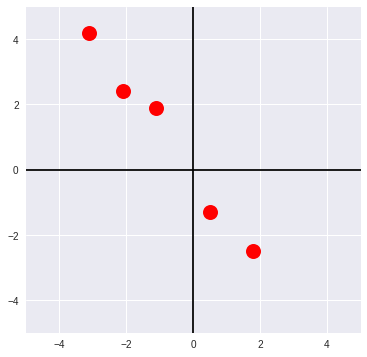

In [34]:
fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(-3.1,4.2,'o',c='red', markersize=15)
plt.plot(-2.1,2.4,'o',c='red', markersize=15)
plt.plot(1.8,-2.5,'o',c='red', markersize=15)
plt.plot(0.5,-1.3,'o',c='red', markersize=15)
plt.plot(-1.1,1.9,'o',c='red', markersize=15)

### There is no line that will work!!!

### What we want is the "best" line

### What we want is the "best" line

Our problem could be defined as such

Given $(-3.1,4.2)$, $(-2.1,2.4)$, $(1.8,-2.5)$, $(0.5,-1.3)$, $(-1.1,1.9)$, we seek $\beta_0$ and $\beta_1$ so that

$$
\left(\begin{matrix}1&-3.1\\1&-2.1\\1&1.8\\1&0.5\\1&-1.1\end{matrix}\right)
\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)=\left(\begin{matrix}4.2\\2.4\\-2.5\\-1.3\\1.9\end{matrix}\right)$$

$$X\beta=\mathbf{y}\implies \beta=X^{-1}\mathbf{y}$$

### Let's Solve it with Python

In [35]:
X = np.array([(1,-3.1),(1,-2.1),(1,1.8),(1,0.5),(1,-1.1)])
y = np.array((4.2,2.4,-2.5,-1.3,1.9))
betas = inverse(X).dot(y)

LinAlgError: Last 2 dimensions of the array must be square

# $X$ has no inverse!!!

### Stretch your Linear Algebra Powers

<img src="http://vignette4.wikia.nocookie.net/harrypotter/images/c/c1/Scabbers_Transfiguration_01.gif"
    width="600px"
    style="display: block; margin: 0 auto">

$$
\left(\begin{matrix}1&-3.1\\1&-2.1\\1&1.8\\1&0.5\\1&-1.1\end{matrix}\right)
\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)=\left(\begin{matrix}4.2\\2.4\\-2.5\\-1.3\\1.9\end{matrix}\right)$$

$$X\beta=\mathbf{y}$$

$$X\beta=\mathbf{y}$$

$$X^TX\beta=X^T\mathbf{y}$$

$$\beta=(X^TX)^{-1}X^T\mathbf{y}$$

## Normal Equations in Matrix Form

This equation is known as the matrix form of the [normal equations](normeq)
$$\beta=(X^TX)^{-1}X^T\mathbf{y}$$

[normeq]: https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Inverting_the_matrix_of_the_normal_equations

In [37]:
X = np.array([(1,-3.1),(1,-2.1),(1,1.8),(1,0.5),(1,-1.1)])
y = np.array((4.2,2.4,-2.5,-1.3,1.9))
betas = inverse(X.T.dot(X)).dot(X.T).dot(y)
print(y)

[ 4.2  2.4 -2.5 -1.3  1.9]


### Check our Answer

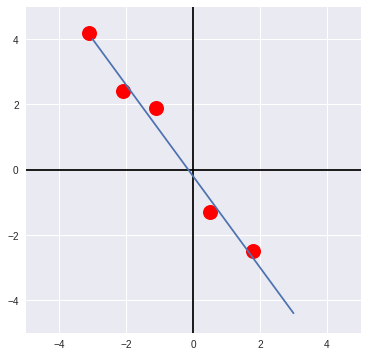

In [38]:
fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(-3.1,4.2,'o',c='red', markersize=15)
plt.plot(-2.1,2.4,'o',c='red', markersize=15)
plt.plot(1.8,-2.5,'o',c='red', markersize=15)
plt.plot(0.5,-1.3,'o',c='red', markersize=15)
plt.plot(-1.1,1.9,'o',c='red', markersize=15)
f = lambda x: beta[0] + beta[1]*x
plt.plot(xs, f(xs))

### "Best" Fit

It can be shown by the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss–Markov_theorem) that the $\beta$ vector we found defines the "best" fit, that is it defines the line with the Best Linear Unbiased Estimator.

<img src="https://s-media-cache-ak0.pinimg.com/originals/98/97/80/9897808ebe39a3098b9c3f26e9bbda1d.jpg"
     width="400px"
     style="display: block; margin: 0 auto">